# Modelo de Hudgkin y Huxley 

## Cecilia Hernández Bautista

## Mateo Calderón Vargas

In [ ]:
using Pkg
Pkg.add("DifferentialEquations")

    Updating registry at `C:\Users\Joshua Abraham\.julia\registries\General.toml`
   Resolving package versions...
   Installed TreeViews ──────────────────────── v0.3.0
   Installed SIMDDualNumbers ────────────────── v0.1.1
   Installed StatsFuns ──────────────────────── v0.9.7
   Installed Referenceables ─────────────────── v0.1.2
   Installed DifferentialEquations ──────────── v6.20.0
   Installed MutableArithmetics ─────────────── v1.3.0
   Installed NonlinearSolve ─────────────────── v0.3.22
   Installed JuliaFormatter ─────────────────── v1.0.34
   Installed LabelledArrays ─────────────────── v1.9.0
   Installed DEDataArrays ───────────────────── v0.2.4
   Installed DiffEqPhysics ──────────────────── v3.11.0
   Installed TimerOutputs ───────────────────── v0.5.23
   Installed DomainSets ─────────────────────── v0.5.15
   Installed Polyester ──────────────────────── v0.6.12
   Installed Bijections ─────────────────────── v0.1.4
   Installed Unitful ────────────────────────── v1.14

   Installed RandomExtensions ───────────────── v0.4.3
   Installed ExponentialUtilities ───────────── v1.23.0
   Installed StrideArraysCore ───────────────── v0.3.17
   Installed VectorizationBase ──────────────── v0.21.33
   Installed Transducers ────────────────────── v0.4.76
   Installed IntegerMathUtils ───────────────── v0.1.1
   Installed IntervalSets ───────────────────── v0.7.3
   Installed Suppressor ─────────────────────── v0.2.3
   Installed RuntimeGeneratedFunctions ──────── v0.5.11
   Installed OpenSSL_jll ────────────────────── v1.1.21+0
   Installed Latexify ───────────────────────── v0.15.21
   Installed CPUSummary ─────────────────────── v0.1.30
   Installed MultiScaleArrays ───────────────── v1.10.0
   Installed TermInterface ──────────────────── v0.2.3
   Installed VertexSafeGraphs ───────────────── v0.2.0
   Installed LLVMOpenMP_jll ─────────────────── v15.0.4+0
   Installed Primes ─────────────────────────── v0.5.3
   Installed Baselet ────────────────────────── v

  [90014a1f] + PDMats v0.11.17
  [65888b18] + ParameterizedFunctions v5.15.0
  [d96e819e] + Parameters v0.12.3
  [69de0a69] ↑ Parsers v2.5.9 ⇒ v2.7.0
  [e409e4f3] + PoissonRandom v0.4.4
⌅ [f517fe37] + Polyester v0.6.12
⌅ [1d0040c9] + PolyesterWeave v0.1.13
  [85a6dd25] + PositiveFactorizations v0.2.4
⌅ [d236fae5] + PreallocationTools v0.2.4
  [aea7be01] ↑ PrecompileTools v1.1.1 ⇒ v1.1.2
  [27ebfcd6] + Primes v0.5.3
  [1fd47b50] + QuadGK v2.8.2
  [74087812] + Random123 v1.6.1
  [fb686558] + RandomExtensions v0.4.3
  [e6cf234a] + RandomNumbers v1.5.3
⌃ [731186ca] + RecursiveArrayTools v2.32.3
  [f2c3362d] + RecursiveFactorization v0.2.18
  [42d2dcc6] + Referenceables v0.1.2
  [ae5879a3] + ResettableStacks v1.1.1
  [79098fc4] + Rmath v0.7.1
  [7e49a35a] + RuntimeGeneratedFunctions v0.5.11
  [3cdde19b] + SIMDDualNumbers v0.1.1
  [94e857df] + SIMDTypes v0.1.0
  [476501e8] + SLEEFPirates v0.6.39
⌃ [0bca4576] + SciMLBase v1.81.0
⌅ [efcf1570] + Setfield v0.8.2
  [699a6c99] + SimpleTraits v0.9.

In [1]:
using Plots, DifferentialEquations, LaTeXStrings

LoadError: ArgumentError: Package DifferentialEquations not found in current path.
- Run `import Pkg; Pkg.add("DifferentialEquations")` to install the DifferentialEquations package.

In [2]:

## Constants
const C_m     = 1       # μF/cm², membrane capacitance
const G_NaMax = 120     # mS/cm², maximum conductivity of Na channel
const G_KMax  = 36      # mS/cm², maximum conductivity of K channel
const G_L     = 0.3     # mS/cm², leak conductivity
const V_r  = -65        # mV, resting potential
const V_Na =  115        # mV, Nernst voltage for Na 
const V_K  = -12        # mV, Nernst voltage for K
const V_L  = 10.613    # mV, Nernst voltage for leak

## Function Definitions
α_n(dV) = (0.1 - 0.01*dV)/(exp(1 - 0.1*dV)- 1)
β_n(dV) = 0.125/(exp(0.0125*dV))
α_m(dV) = (2.5 - 0.1*dV)/(exp(2.5 - 0.1*dV)- 1)
β_m(dV) = 4/(exp(dV/18))
α_h(dV) = 0.07/(exp(0.05*dV))
β_h(dV) = 1/(exp(3 - 0.1*dV)+ 1)

# Steady states


n_∞(dV) = α_n(dV)/(α_n(dV)+β_n(dV))
m_∞(dV) = α_m(dV)/(α_m(dV)+β_m(dV))
h_∞(dV) = α_h(dV)/(α_h(dV)+β_h(dV))

h_∞ (generic function with 1 method)

In [15]:
using DifferentialEquations

# Injected Current Function
I_inj(t) = 10 * (5 < t < 30)
 
G_Ka(n) = G_KMax  .* (n).^4
G_Na(t) = G_NaMax * h * m^3


function HH_model(u,p,t)
    n, m, h, Vm = u 
    
    # Update transfer rate coefficients, n, m, and h
    V_diff = Vm - V_r         # difference between the rest voltage and membrane voltage
    dn = α_n(V_diff)*(1-n) - β_n(V_diff)*n
    dm = α_m(V_diff)*(1-m) - β_m(V_diff)*m
    dh = α_h(V_diff)*(1-h) - β_h(V_diff)*h
    
    # Update cell membrane voltage, Vm
    G_K  = G_KMax  * n^4       # Sodium conductance
    G_Na = G_NaMax * h * m^3   # Potasium conductance
    dVm = (I_inj(t) + (V_Na - Vm)*G_Na + (V_K - Vm)*G_K + (V_L - Vm)*G_L)/C_m 

    [dn; dm; dh; dVm]
    
       

end

## Run Model:
u0 = [n_∞(0); m_∞(0) ; h_∞(0); -65.1]
tspan = (0.0,50.0)
prob = ODEProblem(HH_model, u0, tspan)
sol = solve(prob, saveat=0.01)

retcode: Success
Interpolation: 1st order linear
t: 5001-element Vector{Float64}:
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.06
  0.07
  0.08
  0.09
  0.1
  0.11
  0.12
  ⋮
 49.89
 49.9
 49.91
 49.92
 49.93
 49.94
 49.95
 49.96
 49.97
 49.98
 49.99
 50.0
u: 5001-element Vector{Vector{Float64}}:
 [0.3176769140606974, 0.05293248525724958, 0.5961207535084603, -65.1]
 [0.3176802954891736, 0.052963859025928366, 0.5961158016570717, -64.66054577632018]
 [0.31769610010466504, 0.05310745847248479, 0.596092614606155, -64.22394056356104]
 [0.31772441251534517, 0.05335880447450478, 0.5960509751240497, -63.79001900632507]
 [0.31776531964502946, 0.053713885797148815, 0.5959906471857399, -63.35861780771072]
 [0.31781891073317525, 0.05416915909315198, 0.5959113759728542, -62.9295757293125]
 [0.3178852773348819, 0.05472154890282386, 0.5958128878736658, -62.502733591220945]
 [0.3179645135395506, 0.055368372665198264, 0.5956948904280664, -62.07793019807202]
 [0.3180567164897979, 0.05610727264928617, 0.

In [16]:
epsilon= 0.000000000000001
function alpha_m(V)
    α_m = (0.1*(25-V))/(ℯ^((25-V)/10)-1)

if abs(V-25) < epsilon               #Si el valor absoluto de V-25 es menor a nuestro grado de aproximación ϵ
        return 0.1                   #Por L´Hopital el límite cuando V tiende a 25 es 0.1
    else 
        return α_m
    end 
end


function alpha_h(V)
    α_h = 0.07*ℯ^(-V/20)
    return α_h
end

G_Na(alpha_h, alpha_m) = (G_NaMax .* alpha_h.(V).*alpha_m.(V))*t

G_Na (generic function with 2 methods)

In [17]:
I_inj(t) = 10 * (5 < t < 30)

I_inj (generic function with 1 method)

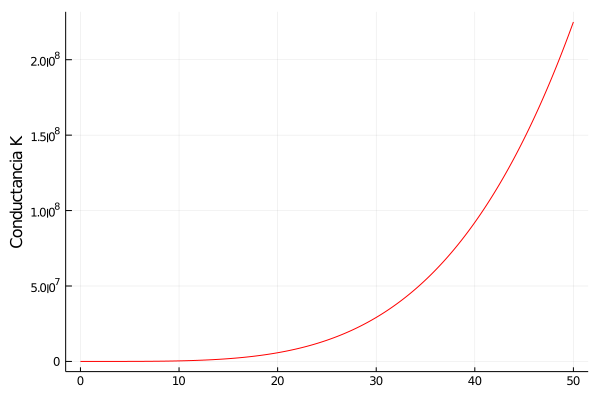

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [18]:
plot(sol.t, G_Ka.(sol.t), legend=false, lc=:red, ylabel="Conductancia K")

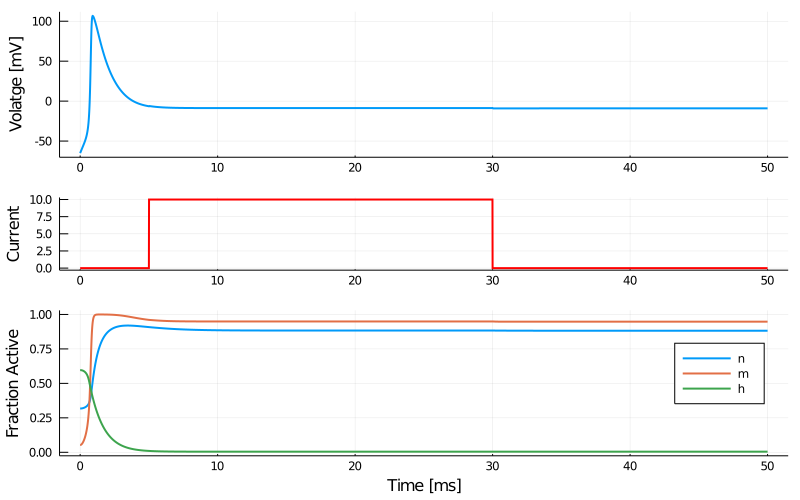

In [19]:
## Plotting
p1 = plot(sol.t, sol[4,:], legend=false, ylabel="Volatge [mV]")
p2 = plot(sol.t, I_inj.(sol.t), legend=false, lc=:red, ylabel="Current")
p3 = plot(sol.t, sol[1:3,:]', label=["n" "m" "h"], legend=:topright, 
          xlabel="Time [ms]", ylabel="Fraction Active")





l = grid(3, 1, heights=[0.4, 0.2 ,0.4])
plot(p1, p2, p3, layout = l, size=(800,500), lw=2)

In [20]:
 DeltaT = 0.01   # ms
    maxT = 50.0     # ms    
    V0 = 0.0       # mV
    gNa = 120.0     # mS/cm2
    gK = 36.0
    gL = 0.3
    Cm = 1.0        # micro F/cm2
    ENa = 115.0    # Utilizando la convensión original de Hodkin-Huxley
    EK = -12.0
    EL = 10.613

V = 10



t0=10.0
tfin=16.0
current=6.5

function Iext(t)
        
     Iext= gNa*gK*t
        
        
        if (t>t0) & (t<tfin)
            return current # micro A/cm2
        else
            return 0
        end
   
    end

Iext (generic function with 1 method)

In [21]:
parametros = Dict(
    "DeltaT" => 0.01,   # ms
    "maxT" => 50.0,     # ms    
    "V0" => 0.0,        # mV
    "gNa" => 120.0,     # mS/cm2
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,        # micro F/cm2
    "ENa" => 115.0,     # Utilizando la convensión original de Hodkin-Huxley
    "EK" => -12.0,
    "EL" => 10.613,
    
"V" => 10,
"t0"=> 10.0,
"tfin"=> 16.0,
"current"=> 6.5)




function Iext(t)
        

if (t>t0) & (t<tfin)
            return 6.5 # micro A/cm2
        else
            return 0
        end
 
    
    
    end
 

Iext (generic function with 1 method)

# Parte de defición de las primeras funciones

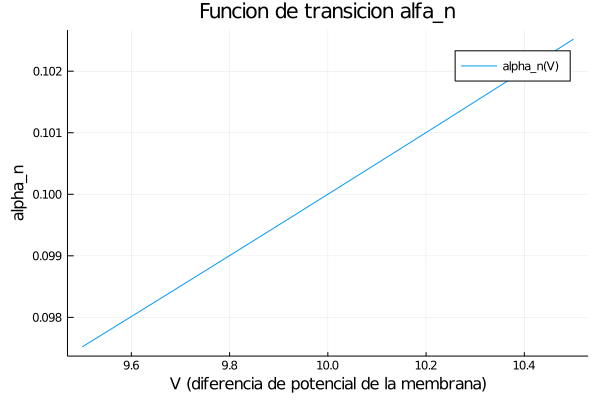

In [22]:
#SOLUCIÓN
#La función es indefinida de V= 9.9999999999999999 a V= 10.000000000000001, entonces el epsilon adecuado es:

epsilon= 0.000000000000001

function alpha_n(V)
    α_n = (0.01 * (10 - V)) / (ℯ^((10-V) / 10) .- 1)

if abs(V-10) < epsilon                  #Si el valor absoluto de V-10 es menor a nuestro grado de aproximación ϵ
        return 0.1                      #Por L´Hopital el límite cuando V tiende a 10 es 0.1
    else 
        return α_n
    end 
end


plot(alpha_n, 9.5:0.1:10.5, title="Funcion de transicion alfa_n", 
    xlabel="V (diferencia de potencial de la membrana)", ylabel= "alpha_n", label="alpha_n(V)")


#Observamos que la gráfica ya no tiene un intervalo abierto de V= 9.9999999999999999 a V= 10.000000000000001

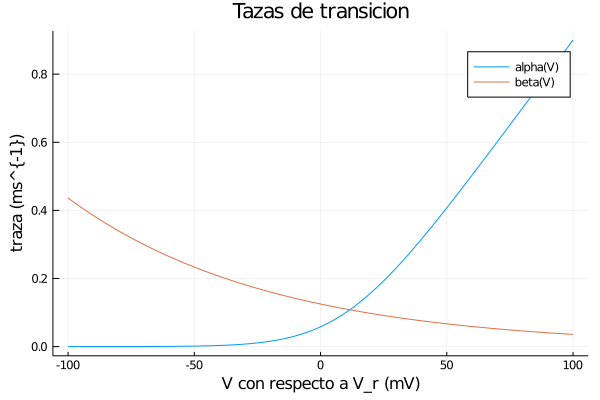

In [23]:
##SOLUCIÓN

#Función beta_n

function beta_n(V) 
    β_n = 0.125*ℯ^(-V/80)
    return β_n
end



V = -100:0.1:100
α = alpha_n.(V)
β = beta_n.(V)

plot(V, α, title="Tazas de transicion", xlabel="V con respecto a V_r (mV)", ylabel="traza (ms^{-1})", label="alpha(V)")
plot!(V,β, label="beta(V)")

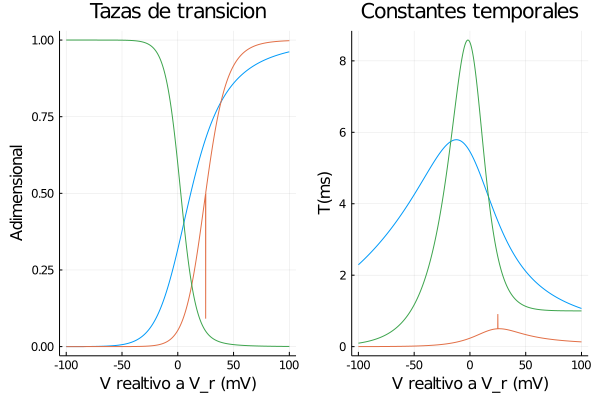

In [24]:
##SOLUCIÓN

#α_m
#La función es indefinida de V= 24.999999999999999 a V= 25.000000000000001, entonces el epsilon adecuado es:

epsilon= 0.000000000000001

function alpha_m(V)
    α_m = (0.1*(25-V))/(ℯ^((25-V)/10)-1)

if abs(V-25) < epsilon               #Si el valor absoluto de V-25 es menor a nuestro grado de aproximación ϵ
        return 0.1                   #Por L´Hopital el límite cuando V tiende a 25 es 0.1
    else 
        return α_m
    end 
end


#β_m
function beta_m(V)
    β_m = 4*ℯ^-(V/18)
    return β_m
end

#α_h
function alpha_h(V)
    α_h = 0.07*ℯ^(-V/20)
    return α_h
end

#β_h
function beta_h(V)
    β_h = 1/(ℯ^((30-V)/10)+1)
    return β_h
end



#Función general de τau para el canal de potasio y sodio 
function tau_inf(alpha, beta)
    τ_∞ = 1 ./(alpha .+ beta)
    return τ_∞
end


#Función general de n para el canal de potasio y sodio 
function n_inf(alpha, beta)
    n_∞ = alpha ./ (alpha .+ beta)
    return n_∞
end






#probado

function plotParameters() 

V = -100:0.1:100
α_n = alpha_n.(V)
β_n = beta_n.(V)

α_m = alpha_m.(V)
β_m = beta_m.(V)

α_h = alpha_h.(V)
β_h = beta_h.(V)



  
n_∞_n = n_inf(α_n, β_n)
τ_∞_n = tau_inf(α_n, β_n)
    
n_∞_m = n_inf(α_m, β_m)
τ_∞_m = tau_inf(α_m, β_m)
    
n_∞_h = n_inf(α_h, β_h)
τ_∞_h = tau_inf(α_h, β_h)

matriz = [n_∞_n n_∞_m n_∞_h]
matriz = [τ_∞_n τ_∞_m τ_∞_h]

    

p1= plot(V, [n_∞_n n_∞_m n_∞_h], title= "Tazas de transicion",label= false, xlabel= "V realtivo a V_r (mV)",
        ylabel= "Adimensional")
p2 = plot(V,[τ_∞_n τ_∞_m τ_∞_h], title= "Constantes temporales" ,label = false, xlabel= "V realtivo a V_r (mV)", 
        ylabel= "T(ms)")
    
plot(p1, p2)
 

end
plotParameters() 

In [25]:
function Iext(t)
        
        if (t>t0) & (t<tfin)
            return current # micro A/cm2
        else
            return 0
        end
        
   
end

Iext (generic function with 1 method)

### Observaciones

Mientras más aumente la corriente inyectada, en este caso con nuestra función "Iext" aumenta la despolarización de la membrana, lo que provoca que alcance valores de voltaje positivo, y con esta despolarización se activan los canales de Sodio y Potasio, definidas como "m" y "n" respectivamente. Con las curvas observamos la propagación hacia valores positivos mientras que la gráfica de h decrece porque es la inactivación del Sodio, y a su vez observamos que la conductancia de Sodio incrementa ligeramente.

### Conclusiones

Con base en los resultados obtenidos, es posible ver como el modelo de Hudgkin y Huxley describe de forma precisa tanto la propagación del potencial de acción, como el umbral y periodo refractario.
Del mismo modo, permite predecir el comportamiento de las concentraciones de los iones Sodio (Na+) y Potasio (K+), al interior y exterior de la membrana, con las tasas de transición.  .

## Referencias

Häusser M. (2000) The Hudgkin-Huxley theory of the action potential. Nature. 3(1): 1

Huerta R. (2004) Un método para predecir el número de
potenciales de acción producidos por el modelo
clásico de Hodgkin Huxley cuando la corriente
aplicada es constante.

Koch. C. Biophysics of Computation. Oxford University Press (1999)